## 1. Overview and Research Question

Instagram is a major platform for sharing content and building audiences, so understanding what drives engagement can help creators and businesses post more effectively. In this project, I analyze post-level data from a single Instagram account. For each post, I have counts of impressions, likes, comments, saves, shares, profile visits, follows, and how many impressions came from different discovery sources (Home, Hashtags, Explore, Other), along with captions and hashtags.

My main question is: **How do engagement behaviors (likes, comments, saves, and shares), hashtags, and discovery sources relate to impressions and follows for Instagram posts from this account?**

I use descriptive statistics, correlations, and visualizations to explore these relationships and draw data-driven conclusions about what seems to be associated with better post performance.


# Data Description

In [1]:
import pandas as pd

df = pd.read_csv("Instagram_data.csv", encoding="latin1")
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [2]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

## The dataset contains 119 Instagram posts from a single account. Each row represents one post and includes:

- **Impressions**: total number of times the post was seen.
- **From Home, From Hashtags, From Explore, From Other**: number of impressions from each discovery source.
- **Likes, Comments, Saves, Shares**: engagement actions on the post.
- **Profile Visits, Follows**: actions that move users to the profile or convert to new followers.
- **Caption**: text of the post.
- **Hashtags**: hashtags used in the post.

There are no missing values in any column, so the dataset is complete and ready for analysis.


## 3. Data Collection and Wrangling

This dataset was provided as a CSV file of Instagram posts from one account. I did not collect it myself using the Instagram API, but I treat it as post-level performance data that includes impressions, engagement actions, and discovery sources. For this project, I focus on how these metrics relate to each other rather than how the data was originally scraped.

Before analyzing the data, I created a few new variables to summarize engagement and measure hashtags and discovery sources.


In [3]:
# Create total engagement
df['Engagement'] = df['Likes'] + df['Comments'] + df['Saves'] + df['Shares']

# Count hashtags
def count_hashtags(tag_string):
    if pd.isna(tag_string):
        return 0
    return sum(1 for token in str(tag_string).split() if token.startswith('#'))

df['Hashtag_Count'] = df['Hashtags'].apply(count_hashtags)

# Shares of impressions from hashtags and explore
df['Hashtag_Share'] = df['From Hashtags'] / df['Impressions']
df['Explore_Share'] = df['From Explore'] / df['Impressions']

df[['Impressions','Engagement','Hashtag_Count','Hashtag_Share','Explore_Share']].head()


,Impressions,Engagement,Hashtag_Count,Hashtag_Share,Explore_Share
0,3920,274,22,0.262245,0.157908
1,5394,439,18,0.340749,0.217649
2,4021,184,18,0.295449,0.000000
3,4528,402,11,0.137147,0.205830
4,2518,228,29,0.101271,0.110802


I created an **Engagement** variable by adding likes, comments, saves, and shares to capture total interaction for each post. I also created a **Hashtag_Count** variable that counts how many hashtags are used, and calculated the share of impressions that came from hashtags and from the Explore page. These derived variables make it easier to compare posts and explore relationships in the analysis.


## 4. Methods and Analysis

I use three main types of analysis in this project:

1. **Descriptive statistics** to summarize the distribution of impressions, engagement, hashtag use, profile visits, and follows.
2. **Correlations and scatterplots** to explore relationships between variables such as impressions and engagement, hashtag count and engagement, and the share of impressions from hashtags or Explore and engagement and follows.
3. **Visualizations** (histograms and scatterplots) to show patterns visually and support the interpretation of the numerical results.

All analysis is done in Python using pandas and matplotlib inside a Jupyter Notebook.


In [4]:
df[['Impressions','Engagement','Hashtag_Count','Profile Visits','Follows']].describe()


,Impressions,Engagement,Hashtag_Count,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,343.117647,18.957983,50.621849,20.756303
std,4843.780105,238.849012,4.861462,87.088402,40.921580
min,1941.000000,104.000000,10.000000,4.000000,0.000000
25%,3467.000000,202.500000,17.000000,15.000000,4.000000
50%,4289.000000,288.000000,18.000000,23.000000,8.000000
75%,6138.000000,379.500000,21.000000,42.000000,18.000000
max,36919.000000,1721.000000,30.000000,611.000000,260.000000


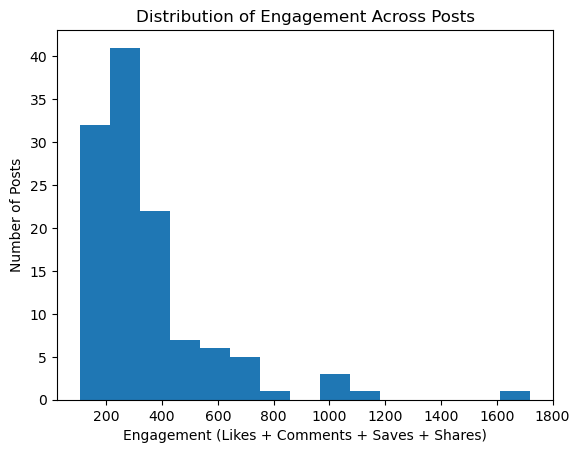

In [5]:
import matplotlib.pyplot as plt

plt.hist(df['Engagement'], bins=15)
plt.xlabel('Engagement (Likes + Comments + Saves + Shares)')
plt.ylabel('Number of Posts')
plt.title('Distribution of Engagement Across Posts')
plt.show()


### 5.1 Overall Patterns

On average, posts in this dataset receive a few thousand impressions and a moderate amount of engagement, but there is a wide range in performance. Most posts fall in a middle range of engagement, while a smaller group of posts receive very high engagement, as shown in the histogram. This variation is helpful because it allows me to compare the characteristics of stronger and weaker posts.


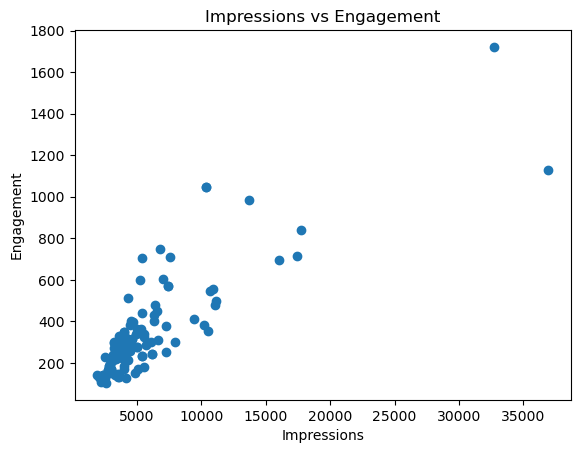

In [6]:
df[['Impressions','Engagement']].corr()

plt.scatter(df['Impressions'], df['Engagement'])
plt.xlabel('Impressions')
plt.ylabel('Engagement')
plt.title('Impressions vs Engagement')
plt.show()


### 5.2 Impressions and Engagement

The scatterplot of Impressions vs. Engagement shows a positive relationship: posts with more impressions usually have higher engagement. However, the points are somewhat spread out, which means that impressions alone do not fully explain engagement. Some posts with similar impression counts have very different engagement levels, suggesting that other factors such as content, topic, or hashtags may also influence how people interact with a post.


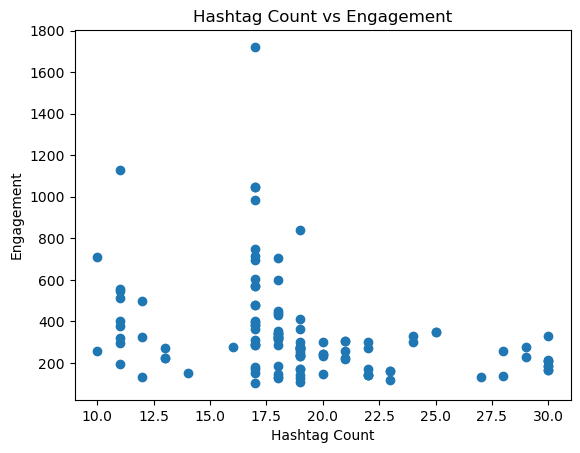

In [7]:
df[['Hashtag_Count','Impressions','Engagement']].corr()

plt.scatter(df['Hashtag_Count'], df['Engagement'])
plt.xlabel('Hashtag Count')
plt.ylabel('Engagement')
plt.title('Hashtag Count vs Engagement')
plt.show()


### 5.3 Hashtags and Engagement

The correlation between the number of hashtags and engagement is relatively small. The scatterplot shows that posts with many hashtags do not always perform better than posts with fewer hashtags. This suggests that simply adding more hashtags is not enough to guarantee higher engagement; the specific hashtags used and the quality of the content may matter more than the raw count.


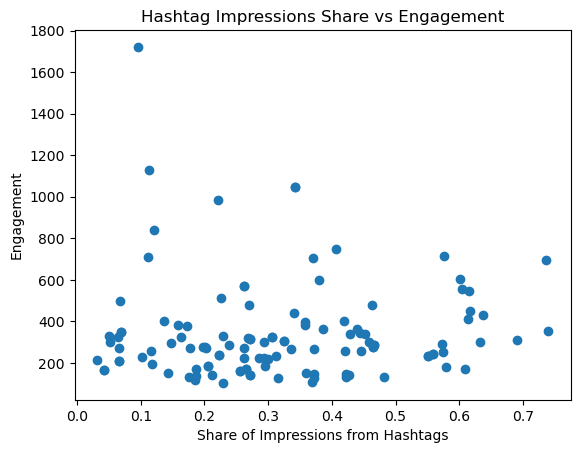

In [8]:
df[['Hashtag_Share','Explore_Share','Engagement','Follows']].corr()

plt.scatter(df['Hashtag_Share'], df['Engagement'])
plt.xlabel('Share of Impressions from Hashtags')
plt.ylabel('Engagement')
plt.title('Hashtag Impressions Share vs Engagement')
plt.show()


### 5.4 Discovery Sources and Follows

Most impressions come from the home feed and hashtags, with a smaller portion from the Explore page and other sources. When I compare the share of impressions from hashtags and Explore with engagement and follows, the relationships appear positive but not extremely strong. Posts that get a larger share of impressions from hashtags or Explore can sometimes achieve higher engagement and more follows, but there are also exceptions. This suggests that discovery through these tools can help, but it is only one part of what makes a post successful.


## 6. Conclusion

The goal of this project was to understand how engagement behaviors, hashtags, and discovery sources relate to impressions and follows for Instagram posts from one account. Overall, I found that posts with higher impressions tend to have higher engagement, which makes sense because more people are seeing them. However, impressions alone do not fully determine success, because some posts with similar reach still have different engagement levels.

The number of hashtags used on a post does not appear to strongly predict engagement by itself. This suggests that it may be more important to choose relevant hashtags and create appealing content than to simply increase the number of tags. Discovery sources such as hashtags and the Explore page can help posts reach new audiences and may be associated with higher engagement and follows in some cases, but the relationships are not extremely strong. 

Taken together, these results suggest that a combination of reach, discovery, and content quality all contribute to post performance. Creators may benefit from focusing on creating engaging content, using thoughtful hashtags, and trying to increase the chances that their posts appear in hashtag searches and on the Explore page.


## 7. Limitations and Next Steps

This project has several limitations. The data come from only one Instagram account, so the findings may not generalize to other accounts or types of content. The dataset does not include media type (image, video, carousel), posting time, or follower count, which means I cannot analyze the effect of different formats or calculate engagement rates relative to audience size. In addition, I rely on simple summary statistics and correlations, and I do not fully analyze the text of captions or the specific hashtags that are used.

In future work, it would be useful to include more accounts, add variables such as media type and posting time, and use more advanced methods like regression models or text analysis on captions and hashtags. These extensions could provide a deeper understanding of which specific content and posting strategies drive the highest engagement and follower growth.
